### Background

MENGGUNAKAN Website (https://www.exchange-rates.org/exchange-rate-history/usd-idr)
1. halaman tersebut carilah `tanggal`, dan `harga harian`
2. Bualah plot pergerakan kurs USD

### Memanggil webpage data  menggunakan `request` library

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

### Hasil dari `.content` tidak rapi maka menggunakan metode beutifulsoup

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,'html.parser')
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Untuk mencari informasi kunci yang kita cari, pertama kita harus menggunakan `kata kunci` yang tepat menggunakan metode `.find()`, kita bisa mengeksplor HTML menggunakan `.prettify()`

In [5]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=u


In [6]:
table = soup.find('section',attrs={'class':'box history-rates-table-box'})
print(table.prettify()[1:500])

section class="box history-rates-table-box">
 <h2 class="title">
  <span>
   USD to IDR History for Last 6 Months
  </span>
 </h2>
 <div class="inner">
  <table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
   <thead>
    <tr>
     <th class="ltr-bidi-fix">
      Date
     </th>
     <th class="ltr-bidi-fix">
      US Dollar to Indonesian Rupiah
     </th>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      <a class="w" href="/exchange-rate-history/usd-idr-2025-03


In [7]:
table.find_all('div', attrs={'class':'inner'})[:5]

[<div class="inner">
 <table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
 <tr>
 <th class="ltr-bidi-fix">Date</th>
 <th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2025-03-21"><span class="nowrap">2025-3-21</span></a>
 <a class="n" href="/exchange-rate-history/usd-idr-2025-03-21"><span class="nowrap">2025-3-21</span></a>
 </td>
 <td>
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,522 IDR</span></span>
 <span class="n"><span class="nowrap">1 USD =</span> <span class="nowrap">16,522 IDR</span></span>
 </td>
 </tr>
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2025-03-20"><span class="nowrap">2025-3-20</span></a>
 <a class="n" href="/exchange-rate-history/usd-idr-2025-03-20"><span class="nowrap">2025-3-20</span></a>
 </td>
 <td>
 <span class="w"><span class="nowrap">1 USD =</span> <span class="n

### ✅ Mendapatkan data untuk harga harian

In [8]:
table.find_all('span', attrs={'class':'w'})[:5]

[<span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,522 IDR</span></span>,
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,464 IDR</span></span>,
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,520 IDR</span></span>,
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,521 IDR</span></span>,
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">16,387 IDR</span></span>]

In [9]:
table.find_all('span', attrs={'class':'w'})[0].text

'1 USD = 16,522 IDR'

### ✅ Mendapatkan data untuk tanggal harian 

In [10]:
table.find_all('a', attrs={'class':'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2025-03-21"><span class="nowrap">2025-3-21</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-03-20"><span class="nowrap">2025-3-20</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-03-19"><span class="nowrap">2025-3-19</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-03-18"><span class="nowrap">2025-3-18</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-03-17"><span class="nowrap">2025-3-17</span></a>]

In [11]:
table.find_all('a', attrs={'class':'w'})[0].text

'2025-3-21'

In [12]:
row = table.find_all('a', attrs={'class':'w'})
row_length = len(row)
row_length

130

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the inflation rate. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.

In [13]:
temp = []  # Initiating a tuple

for i in range(0, row_length):
    #data tanggal
    Date = table.find_all('a', attrs={'class':'n'})[i].text

    #Data harga
    USD_RUPIAH = table.find_all('span', attrs={'class':'w'})[i].text
    USD_RUPIAH = USD_RUPIAH.strip()

  
    temp.append((Date,USD_RUPIAH)) 
temp

[('2025-3-21', '1 USD = 16,522 IDR'),
 ('2025-3-20', '1 USD = 16,464 IDR'),
 ('2025-3-19', '1 USD = 16,520 IDR'),
 ('2025-3-18', '1 USD = 16,521 IDR'),
 ('2025-3-17', '1 USD = 16,387 IDR'),
 ('2025-3-14', '1 USD = 16,328 IDR'),
 ('2025-3-13', '1 USD = 16,388 IDR'),
 ('2025-3-12', '1 USD = 16,413 IDR'),
 ('2025-3-11', '1 USD = 16,454 IDR'),
 ('2025-3-10', '1 USD = 16,331 IDR'),
 ('2025-3-7', '1 USD = 16,300 IDR'),
 ('2025-3-6', '1 USD = 16,326 IDR'),
 ('2025-3-5', '1 USD = 16,280 IDR'),
 ('2025-3-4', '1 USD = 16,384 IDR'),
 ('2025-3-3', '1 USD = 16,461 IDR'),
 ('2025-2-28', '1 USD = 16,531 IDR'),
 ('2025-2-27', '1 USD = 16,561 IDR'),
 ('2025-2-26', '1 USD = 16,373 IDR'),
 ('2025-2-25', '1 USD = 16,321 IDR'),
 ('2025-2-24', '1 USD = 16,290 IDR'),
 ('2025-2-21', '1 USD = 16,302 IDR'),
 ('2025-2-20', '1 USD = 16,256 IDR'),
 ('2025-2-19', '1 USD = 16,354 IDR'),
 ('2025-2-18', '1 USD = 16,324 IDR'),
 ('2025-2-17', '1 USD = 16,227 IDR'),
 ('2025-2-14', '1 USD = 16,180 IDR'),
 ('2025-2-13', '1

Membuat data menjadi dari bawah ke atas

In [14]:
temp = temp[::-1]
temp

[('2024-9-23', '1 USD = 15,172 IDR'),
 ('2024-9-24', '1 USD = 15,140 IDR'),
 ('2024-9-25', '1 USD = 15,220 IDR'),
 ('2024-9-26', '1 USD = 15,134 IDR'),
 ('2024-9-27', '1 USD = 15,125 IDR'),
 ('2024-9-30', '1 USD = 15,205 IDR'),
 ('2024-10-1', '1 USD = 15,281 IDR'),
 ('2024-10-2', '1 USD = 15,304 IDR'),
 ('2024-10-3', '1 USD = 15,487 IDR'),
 ('2024-10-4', '1 USD = 15,670 IDR'),
 ('2024-10-7', '1 USD = 15,736 IDR'),
 ('2024-10-8', '1 USD = 15,690 IDR'),
 ('2024-10-9', '1 USD = 15,709 IDR'),
 ('2024-10-10', '1 USD = 15,668 IDR'),
 ('2024-10-11', '1 USD = 15,569 IDR'),
 ('2024-10-14', '1 USD = 15,578 IDR'),
 ('2024-10-15', '1 USD = 15,586 IDR'),
 ('2024-10-16', '1 USD = 15,590 IDR'),
 ('2024-10-17', '1 USD = 15,525 IDR'),
 ('2024-10-18', '1 USD = 15,474 IDR'),
 ('2024-10-21', '1 USD = 15,564 IDR'),
 ('2024-10-22', '1 USD = 15,591 IDR'),
 ('2024-10-23', '1 USD = 15,642 IDR'),
 ('2024-10-24', '1 USD = 15,632 IDR'),
 ('2024-10-25', '1 USD = 15,695 IDR'),
 ('2024-10-28', '1 USD = 15,753 IDR'),

----- END OF THE DAY 1 OF CAPSTONE PROJECT WEBSCRAPPING
BESOK MENJADIKAN  DATAFRAME KEMUDIAN DIOLAH DATANYA MENGGUNAKAN METODE
1. Virtual environment preparation
2. Scrap data from website using `BeautifulSoup`
3. Creating dataframe
4. Data preprocessing
   - Data Cleansing
   - Data Wrangling
5. Data visualization
6. Building `flask` Dashboard

### 📝**Membuat Pandas Dataframe dan Data Wrangling**

In [15]:
import pandas as pd

df= pd.DataFrame(temp, columns= ('Date', 'USD_RUPIAH'))

df.head(5)

,Date,USD_RUPIAH
0,2024-9-23,"1 USD = 15,172 IDR"
1,2024-9-24,"1 USD = 15,140 IDR"
2,2024-9-25,"1 USD = 15,220 IDR"
3,2024-9-26,"1 USD = 15,134 IDR"
4,2024-9-27,"1 USD = 15,125 IDR"


#### 𝌡 Cek Tipe Data dan Merubah Tipe Data

In [16]:
df.dtypes

Date          object
USD_RUPIAH    object
dtype: object

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes

Date          datetime64[ns]
USD_RUPIAH            object
dtype: object

In [18]:
df['Date']

0     2024-09-23
1     2024-09-24
2     2024-09-25
3     2024-09-26
4     2024-09-27
         ...    
125   2025-03-17
126   2025-03-18
127   2025-03-19
128   2025-03-20
129   2025-03-21
Name: Date, Length: 130, dtype: datetime64[ns]

In [19]:
df.dtypes

Date          datetime64[ns]
USD_RUPIAH            object
dtype: object

In [20]:
df['USD_RUPIAH'] = df['USD_RUPIAH'].str.extract(r'(\d+,\d+)')[0].str.replace(',','').astype(float)

In [21]:
df.dtypes

Date          datetime64[ns]
USD_RUPIAH           float64
dtype: object

#### ✒️ Merubah nama kolom USD_RUPIAH menjadi 1 USD to IDR

In [22]:
df= df.rename(columns={'USD_RUPIAH': '1 USD to IDR'})

In [23]:
df.head()

,Date,1 USD to IDR
0,2024-09-23,15172.0
1,2024-09-24,15140.0
2,2024-09-25,15220.0
3,2024-09-26,15134.0
4,2024-09-27,15125.0


### 📊Membuat Data Visualization

#### Untuk membuat plot yang seperti kita inginkan, kita harus mengatur index dari dataframe kepada kolom waktu menggunakan metode `set_index()`

In [24]:
df=df.set_index('Date')

DATA VISUALISASI

<Axes: xlabel='Date'>

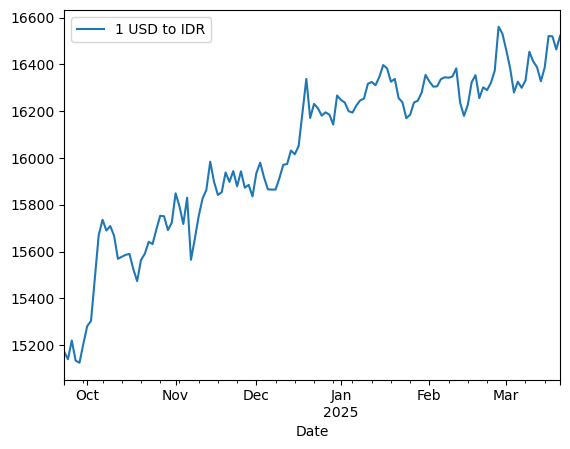

In [25]:
df.plot()

----- END OF THE DAY 2 OF CAPSTONE PROJECT WEBSCRAPPING

1. Membuat plot lebih menarik dan informatif lagi
2. Mengaplikasikan hasilnya ke dashboard

#### 📈 Membuat visualisasi lebih menarik dan mudah untuk dilihat

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


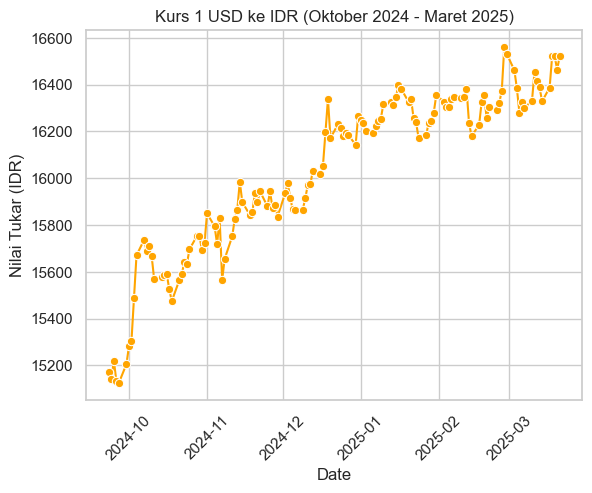

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid') #Tema
sns.lineplot(x='Date', y='1 USD to IDR', data=df, marker='o', color= 'orange')
plt.title('Kurs 1 USD ke IDR (Oktober 2024 - Maret 2025)')
plt.ylabel('Nilai Tukar (IDR)')
plt.xticks(rotation=45) # Putar label tanggal jika perlu
plt.show()

----- END OF THE DAY 3 OF CAPSTONE PROJECT WEBSCRAPPING

- Pengumpulan Projetc Capstone ke Github